In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# import dependencies
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
Base = automap_base()

In [6]:
Base.prepare(engine)

In [7]:
Base.classes.keys()

['measurement', 'station']

In [8]:
from sqlalchemy import inspect
inspector = inspect(engine)

In [9]:
inspector.get_table_names()

['measurement', 'station']

In [10]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
session = Session(engine)

# Precipitation Analysis

In [12]:
# get the most recent date (measurement)
result = session.query(func.max(Measurement.date)).first()
result

('2017-08-23',)

In [13]:
previous_date = dt.date(2017,8,23)-dt.timedelta(days = 365)
previous_date

datetime.date(2016, 8, 23)

In [14]:
recent_prcp = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= previous_date).all()
recent_prcp

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [15]:
# Load the query results into a Pandas DataFrame
prcp_df = pd.DataFrame(recent_prcp, columns = ["date", "prcp"])
prcp_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [16]:
# Sort the DataFrame values by "date"
prcp_df = prcp_df.sort_values("date", ascending = True)
prcp_df

,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


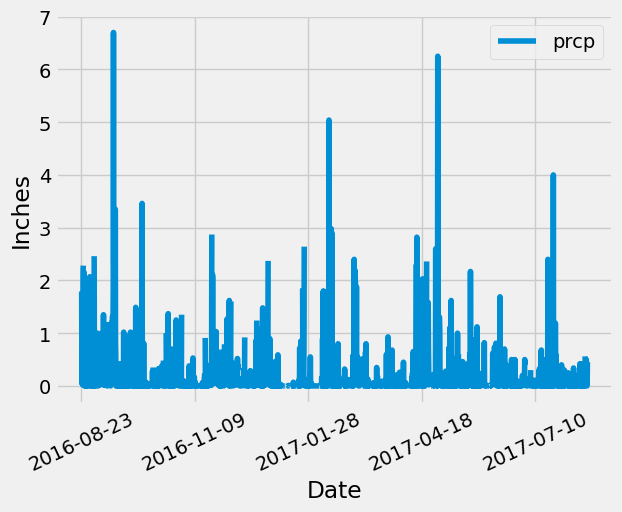

In [53]:
# Plot the results by using DataFrame plot method
prcp_df.plot(x= "date", y = "prcp")
plt.ylabel("Inches")
plt.xlabel("Date")
plt.xticks(rotation = 25)
plt.show()

In [18]:
# print the summary statistics of the precipation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [21]:
result2 = session.query(func.count(Station.id)).first()[0]
result2

9

In [26]:
station_count = session.query(Measurement.station, func.count(Measurement.station))\
.group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [54]:
active_station = station_count[0][0]
active_station

'USC00519281'

In [59]:
# lowest temperature in the most active station
active_station = session.query(Measurement.tobs, func.min(Measurement.tobs)).first()[0]
active_station

53.0

In [60]:
# highest temperature in the most active station
active_station = session.query(Measurement.tobs, func.max(Measurement.tobs)).first()[0]
active_station

87.0

In [61]:
# average temperature in the most active station
active_station = session.query(Measurement.tobs, func.avg(Measurement.tobs)).first()[0]
active_station

65.0

In [62]:
# previous_tobs_date = 

datetime.date(2016, 8, 23)